#$$Puerta XOR$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Dataset de entrenamiento para puerta XOR
x_train = np.array([[0,0],[0,1],[1,0],[1,1]], dtype= "float32")
y_train = np.array([[0],[1],[1],[0]], dtype= "float32")

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 893ms/step - accuracy: 0.7500 - loss: 0.2510
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.2500 - loss: 0.2501
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5000 - loss: 0.2506
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5000 - loss: 0.2504
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5000 - loss: 0.2500
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5000 - loss: 0.2501
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5000 - loss: 0.2503
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5000 - loss: 0.2502
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5000 - loss: 0.2500
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5000 - loss: 0.2500
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5000 - loss: 0.2501
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.5000 - loss: 0.2501
Epoch 13/50

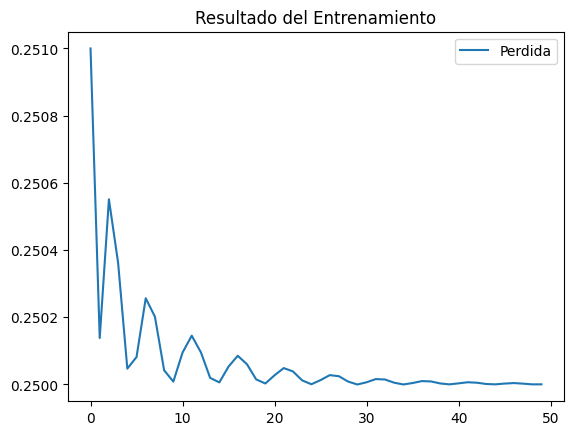

In [4]:
# Modelo MLP
model = keras.Sequential()
model.add(layers.Dense(2, input_dim = 2, activation= 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
# configuración del modelo
model.compile(optimizer=keras.optimizers.Adam(0.1), loss='mean_squared_error', metrics=['accuracy'])
# Entrenamiento
fit_history = model.fit(x_train, y_train, epochs =50, batch_size=4)
#model.summary()
loss_curve = fit_history.history['loss']
#accuracy_curve = fit_history.history['accuracy']
#plt.plot(accuracy_curve, label = 'precisión')
plt.plot(loss_curve,label='Perdida')
plt.legend(loc='lower left')
plt.legend()
plt.title('Resultado del Entrenamiento')
plt.show()

In [5]:
# Recuperamos bias and weights de la capa oculta
weights_HL, biases_HL = model.layers[0].get_weights()

# Recuperamos bias and weights de la capa de salida
weights_OL, biases_OL = model.layers[1].get_weights()

print(weights_HL)
print(biases_HL)
print(weights_OL)
print(biases_OL)

prediccion = model.predict(x_train)
print(prediccion)
print(x_train)
print(y_train)

[[-1.0716895  -0.2842942 ]
 [-0.9569111  -0.27478468]]
[0.         0.61301804]
[[-1.0943679 ]
 [-0.00782691]]
[-0.00297207]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
[[0.49805748]
 [0.49859515]
 [0.49861374]
 [0.49915144]]
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
[[0.]
 [1.]
 [1.]
 [0.]]


#$Clasificación  Supervisada$

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [7]:
# 1. Cargar dataset real (flores Iris)
iris = load_iris()
X, y = iris.data, iris.target


In [8]:
# 2. Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [9]:
# 3. Entrenar modelo supervisado (KNN)
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
# 4. Evaluar
y_pred = model.predict(X_test)
print("Exactitud del modelo:", accuracy_score(y_test, y_pred))

Exactitud del modelo: 1.0


In [11]:
# 5. Predicción con nuevos datos
nueva_flor = [[5.1, 3.5, 1.4, 0.2]]
print("Predicción para la flor nueva:", iris.target_names[model.predict(nueva_flor)][0])


Predicción para la flor nueva: setosa


#CLUSTERING (APRENDIZAJE NO SUPERVISADO)

In [12]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [13]:
# 1. Crear datos artificiales
X, _ = make_blobs(n_samples=200, centers=3, random_state=42)


In [14]:
# 2. Entrenar modelo no supervisado
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

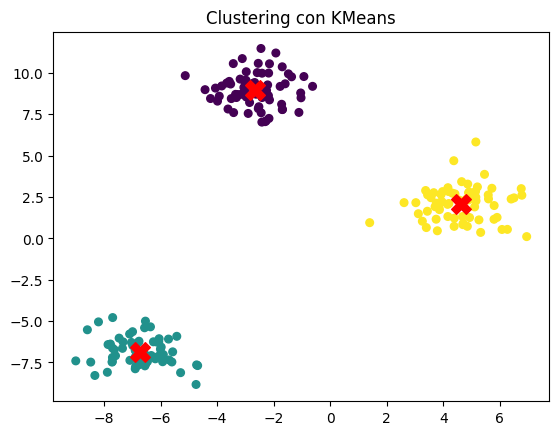

In [15]:
# 3. Visualizar resultados
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap="viridis", s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c="red", marker="X", s=200)
plt.title("Clustering con KMeans")
plt.show()


##Red Neuronal Simple - Backpropagation

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

In [17]:
# 1. Datos de entrenamiento (XOR problem)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

In [18]:
# 2. Crear red neuronal
model = Sequential([
    Dense(4, activation='relu', input_shape=(2,)),  # capa oculta
    Dense(1, activation='sigmoid')                  # capa de salida
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
# 3. Compilar
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
# 4. Entrenar
model.fit(X, y, epochs=500, verbose=0)

In [21]:
# 5. Evaluar predicciones
print("Predicciones XOR:")
print(X, "\n", model.predict(X).round())

Predicciones XOR:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
[[0 0]
 [0 1]
 [1 0]
 [1 1]] 
 [[1.]
 [1.]
 [1.]
 [1.]]
